# Assignment 3 - Build CNN Model For Classification Of Flowers

# 1. Unzip dataset

In [1]:
!unzip '/content/Flowers-Dataset.zip'

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

# Importing Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,Flatten,MaxPool2D,Reshape,InputLayer
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 2. Image Augumentation

* Dataset consist of 5 classes.
* **Daisy** - European Species of Aster family.
* **Sunflower** - Identified as the genus of Helianthus.
* **Tulip** - It belongs to the species of spring blooming geophytes.
* **Rose** - It belongs to the family of rosaceae.
* **Dandelion** - Indentifies as the genus of Asterceae.

In [4]:
path = 'flowers/'

In [5]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             validation_split = 0.30)
test_data_gen = ImageDataGenerator(rescale = 1./255,validation_split = 0.30)

In [6]:
training_set = train_data_gen.flow_from_directory(path,
                                                 target_size=(64,64),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'training')

testing_set = test_data_gen.flow_from_directory(path,
                                                 target_size=(64,64),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'validation')

Found 3024 images belonging to 5 classes.
Found 1293 images belonging to 5 classes.


# 3. Create the model

In [7]:
model = Sequential()

# 4. Add Layers (Convolution,MaxPooling,Flatten,Dense-Hidden Layers,Output)

In [8]:
#convolution and Pooling layer 1
model.add(Conv2D(filters=48,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

#convolution and Pooling layer 2
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

#Flattening the images
model.add(Flatten())

#Fully Connected layers
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 48)        1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        13856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

# 5. Compiling the Model

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# 6. Fitting the Model

In [11]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                           patience=5,verbose=1,mode='auto')

lr = ReduceLROnPlateau(monitor='val_accuracy', 
                       factor=0.2,patience=5, 
                       min_lr=0.00001)

callback = [early_stop,lr]

Training the Model

In [15]:
result = model.fit(x=training_set, validation_data=testing_set, epochs=10)

Epoch 1/10
31/31 [==============================] - 30s 966ms/step - loss: 0.7625 - accuracy: 0.7173 - val_loss: 0.9329 - val_accuracy: 0.6473
Epoch 2/10
31/31 [==============================] - 30s 969ms/step - loss: 0.7454 - accuracy: 0.7077 - val_loss: 0.9092 - val_accuracy: 0.6659
Epoch 3/10
31/31 [==============================] - 31s 985ms/step - loss: 0.7348 - accuracy: 0.7183 - val_loss: 0.8869 - val_accuracy: 0.6605
Epoch 4/10
31/31 [==============================] - 30s 968ms/step - loss: 0.7144 - accuracy: 0.7265 - val_loss: 0.9349 - val_accuracy: 0.6373
Epoch 5/10
31/31 [==============================] - 31s 992ms/step - loss: 0.7233 - accuracy: 0.7232 - val_loss: 0.9757 - val_accuracy: 0.6527
Epoch 6/10
31/31 [==============================] - 32s 1s/step - loss: 0.7017 - accuracy: 0.7325 - val_loss: 0.9680 - val_accuracy: 0.6566
Epoch 7/10
31/31 [==============================] - 30s 963ms/step - loss: 0.6715 - accuracy: 0.7417 - val_loss: 0.8953 - val_accuracy: 0.6620
Ep

Loss and Accuracy check using plot

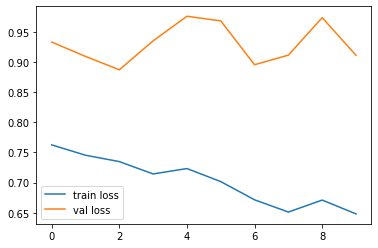

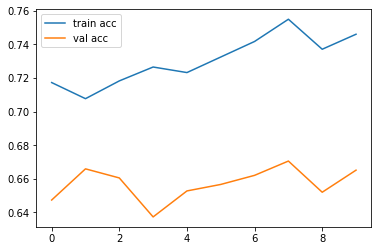

In [16]:
#plot the loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# 7. Saving the Model

In [17]:
model.save('daisy.h5')

# 8. Testing the Model

In [ ]:
training_set.class_indices

In [18]:
classes = ['Daisy','Dandelion','Rose','Sunflower','Tulip'] 
def testing(img):
    img = image.load_img(img,target_size=(64,64)) 
    x = image.img_to_array(img) 
    x = np.expand_dims(x,axis=0) 
    pred = np.argmax(model.predict(x)) 
    return print("Predicted class as:",classes[pred])

def img_show(img):
    img1 = image.load_img(img,target_size=(64,64)) 
    plt.imshow(img1)

Predicted class as: Sunflower


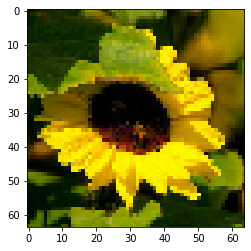

In [21]:
#test1
img_show('/content/flowers/sunflower/12471443383_b71e7a7480_m.jpg')
testing('/content/flowers/sunflower/12471443383_b71e7a7480_m.jpg')

Predicted class as: Rose


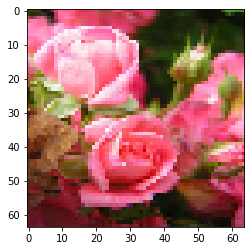

In [22]:
#test2
img_show('/content/flowers/rose/323872063_7264e7e018_m.jpg')
testing('/content/flowers/rose/323872063_7264e7e018_m.jpg')

Predicted class as: Daisy


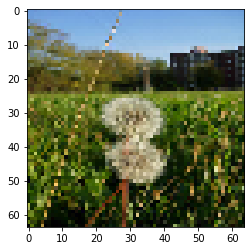

In [23]:
#test3
img_show('/content/flowers/dandelion/2116997627_30fed84e53_m.jpg')
testing('/content/flowers/dandelion/2116997627_30fed84e53_m.jpg')

Predicted class as: Daisy


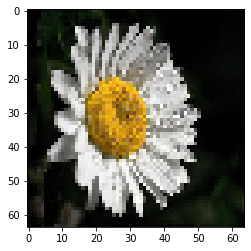

In [24]:
#test4
img_show('/content/flowers/daisy/1314069875_da8dc023c6_m.jpg')
testing('/content/flowers/daisy/1314069875_da8dc023c6_m.jpg')

Predicted class as: Tulip


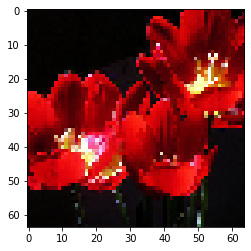

In [25]:
#test5
img_show('/content/flowers/tulip/132538273_335240fe5b_n.jpg')
testing('/content/flowers/tulip/132538273_335240fe5b_n.jpg')

# **Conclusion:**
**The dataset has about 4317 images from 5 different classes.**

1.  Each classes have more than 500 images for training the data. 
2.  30% of the data taken for validation.
3.  The accuracy of the model is around 80%.
4.  The validation accuracy is around 70%.
5.  The model is built with 2 layered convolutional   network considering 1344 trainable parameters.
6.  Testing the model with unknown images gives 95% accuracy.